In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
kinase_scores = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.12.11_FH_minimal/kinase_results/kinase_scores.tsv',
    sep='\t').set_index('PSP Kinases')

In [9]:
kinase_scores = kinase_scores.loc[:, kinase_scores.columns.str.match("^\\S+-.+-\\S+")]
kinase_scores = kinase_scores.loc[:, ~kinase_scores.columns.str.startswith('targets')]

In [15]:
kinase_scores = kinase_scores.loc[~kinase_scores.isna().any(axis=1)]
kinase_scores

,I007-031-108742,I043-005-95540,I007-020-1007541,I007-039-130734,I043-001-80842,I043-005-130270,H021-7AAYWW-T1,H021-7AAYWW-T2,H021-9G2S1F-T1-E2,H021-A8GH43-T2,...,H021-JNQHBW-T4,H021-LS387K-T2,H021-N624KQ-T1,H021-NQ7S9M-T1,H021-PN8G4P-T2,H021-REMV5U-T1,H021-SN3KBH-T1,H021-JNQHBW-T4-R2,H021-YUE8CH-T1,H021-YW2T5S-T1
PSP Kinases,,,,,,,,,,,,,,,,,,,,,
AAK1,1.457086,0.001384,1.162136,1.117227,0.175829,0.177992,0.655224,-0.358097,-0.859552,-1.599024,...,-1.483779,-1.668112,0.501485,0.986369,1.100989,0.729439,0.762809,0.433639,0.829865,0.136034
ABL1,-0.717281,-0.353645,-0.717393,-0.589548,-0.385269,-0.135300,-0.025958,-0.992180,-0.942024,-2.839653,...,0.252064,0.714375,0.427304,0.655344,1.766920,0.920567,1.644686,-0.341424,0.754539,0.177601
AKT1,-0.130134,-1.236474,1.434334,0.512376,-0.094464,-0.766635,-0.050668,-0.916031,-0.728541,-3.531976,...,0.508313,0.350305,0.821105,0.986332,0.504610,0.749670,0.391745,0.369021,0.572710,0.352082
AKT2,-0.757378,0.588496,-0.682273,-0.365209,1.151810,0.141908,0.560057,0.217436,0.295433,-2.082148,...,2.377488,0.586661,-0.429618,-1.710166,-0.736701,-0.539372,-0.412424,1.875199,0.702849,0.146115
AKT3,-1.190365,-1.081356,0.103536,-0.376764,-0.893414,-1.186971,-0.125997,-1.650881,0.395263,-2.335423,...,1.625673,0.761079,0.179240,0.336550,-0.141309,0.619112,-0.066114,1.912670,0.429922,0.761219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRK1,-2.496550,-1.905919,0.992684,0.125729,0.825439,-0.160337,1.198627,-0.033159,0.134696,0.080158,...,-0.698652,0.167852,0.297124,0.590554,0.499077,0.890411,0.300322,0.781885,-1.339534,0.075768
WEE1,-1.195511,1.163332,-1.101002,-0.890111,1.289585,0.379527,0.773928,0.847880,-0.087889,-0.333370,...,2.500814,-0.595674,-0.152301,-0.213588,-0.709250,0.164004,-0.828573,1.532458,0.466740,0.599052
WNK1,-0.628910,-0.508566,-0.719714,-1.130042,-0.837560,-0.043886,-1.197762,-0.804365,-0.008301,0.206164,...,-0.339095,0.196119,0.223071,0.513733,3.468703,0.400427,0.969513,-1.338891,0.979381,-0.194183


<AxesSubplot:ylabel='PSP Kinases'>

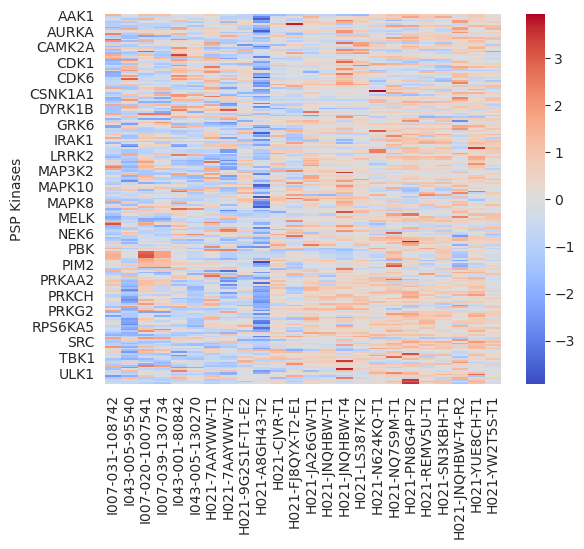

In [16]:
sns.heatmap(kinase_scores, cmap='coolwarm', center=0)

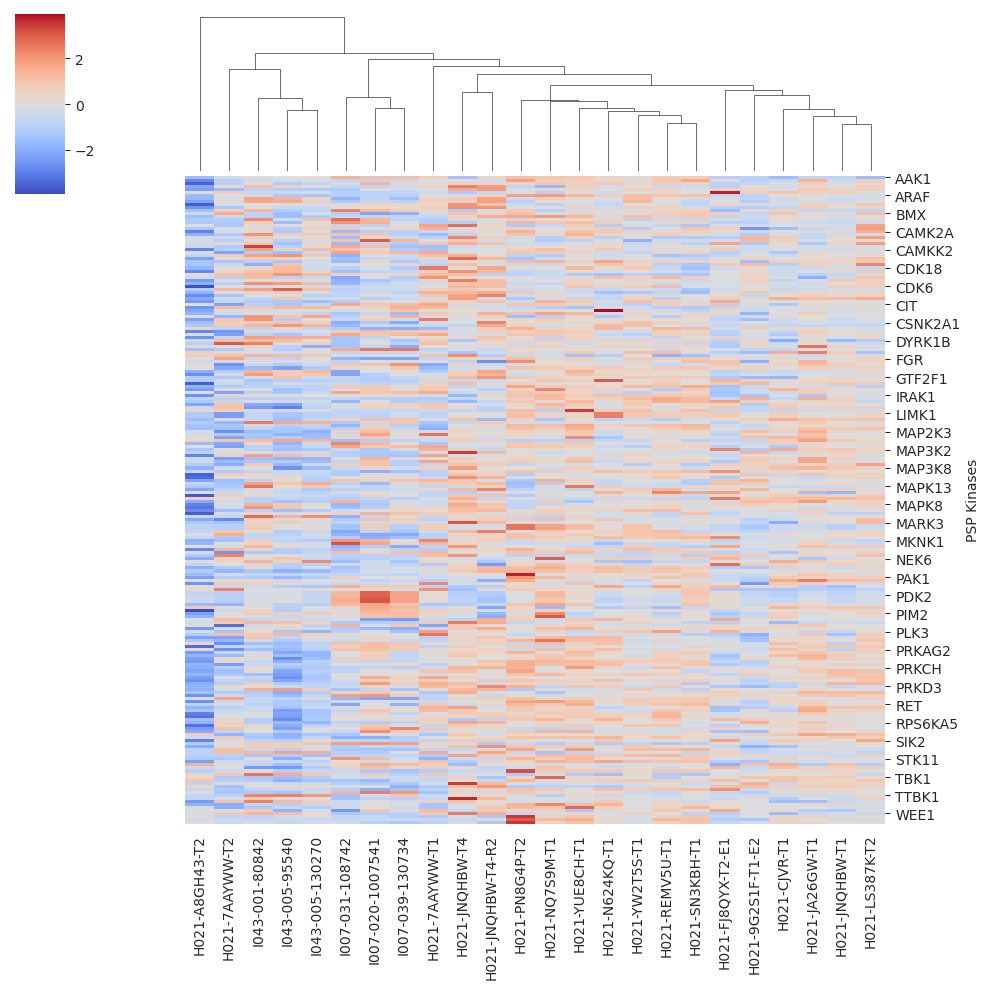

In [18]:
sns.clustermap(kinase_scores, cmap='coolwarm', center=0, row_cluster=False)

In [19]:
preproc = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.12.11_FH_minimal/topas_score_preprocessed.tsv',
    sep='\t')

/tmp/ipykernel_129650/1320605060.py:1: DtypeWarning: Columns (35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  preproc = pd.read_csv('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.12.11_FH_minimal/topas_score_preprocessed.tsv', sep='\t')


In [25]:
preproc
#TODO: Peptide occurrence is calculated using all patient columns, however the metadata columns should not be included! Score calculations are properly fucked and tax non-imputed values much higher than imputed ones

,Unnamed: 0,Modified sequence,Gene names,pat_I007-031-108742,pat_I043-005-95540,pat_I007-020-1007541,pat_I007-039-130734,pat_I043-001-80842,pat_I043-005-130270,pat_H021-7AAYWW-T1,...,PSP_MS_LIT,PSP_MS_CST,PSP_ON_FUNCTION,PSP_ON_PROCESS,PSP_ON_PROT_INTERACT,PSP_ON_OTHER_INTERACT,PSP_NOTES,All site positions,Peptide count,Peptide occurrence
0,0,_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,RRP15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,0.0,NaN,NaN,NaN,NaN,NaN,Q9Y3B9_S11;Q9Y3B9_S8,9,9/48
1,1,_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,TRAF2,0.982867,-0.698993,-0.454260,-0.139072,-0.173320,-1.169109,0.138948,...,14.0,0.0,NaN,NaN,NaN,NaN,NaN,Q12933_S11;Q12933_S20;Q12933_S5;Q12933_T7,24,24/48
2,2,_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,TOMM22,1.294287,-0.142368,0.691419,0.942673,0.435598,-0.323369,0.241526,...,28.0,1.0,NaN,NaN,NaN,NaN,NaN,Q9NS69_S15,26,26/48
3,3,_(Acetyl (Protein N-term))AAAVAAPLAAGGEEAAATTS...,LRCH4,2.155925,-0.148495,1.978191,-0.148495,-0.148495,1.704904,-0.148495,...,11.0,1.0,NaN,NaN,NaN,NaN,NaN,O75427_S21;O75427_S25;O75427_T19;O75427_T20,27,27/48
4,4,_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,RAVER1,0.336164,0.721916,0.374226,0.513109,0.545258,0.522948,0.670305,...,28.0,0.0,NaN,NaN,NaN,NaN,NaN,Q8IY67-2_S14;Q8IY67-2_S6;Q8IY67-2_T8;Q8IY67_S1...,24,24/48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50449,50449,_pYpSVDKpTLSHPWLQDpYQpTWLDLR_,PRKD1,2.453461,-1.768928,1.206276,0.986624,-1.324144,-0.682574,0.678454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q15139_S829;Q15139_S835;Q15139_T833;Q15139_T84...,8,8/48
50450,50450,_pYpSVDKpTLSHPWLQDpYQpTWLDLR_,PRKD1,2.453461,-1.768928,1.206276,0.986624,-1.324144,-0.682574,0.678454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q15139_S829;Q15139_S835;Q15139_T833;Q15139_T84...,8,8/48
50451,50451,_pYpSpTVLSR_,GJB4,0.567327,1.296982,-1.909460,0.376525,-0.158581,-0.542072,-2.124891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q9NTQ9_S17;Q9NTQ9_S21;Q9NTQ9_T18;Q9NTQ9_Y16,8,8/48
50452,50452,_pYpSpTVLSR_,GJB4,0.567327,1.296982,-1.909460,0.376525,-0.158581,-0.542072,-2.124891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q9NTQ9_S17;Q9NTQ9_S21;Q9NTQ9_T18;Q9NTQ9_Y16,8,8/48


In [23]:
def calculate_fc(row):
    row = row.loc[row.index.str.startswith('pat')]
    retrow = pd.Series(index=row.index)
    for pat in row.index:
        patavg = row.loc[row.index != pat].mean()
        retrow[pat] = row[pat] - patavg
    return retrow


preproc.apply(calculate_fc, axis=1)

/tmp/ipykernel_129650/1425791649.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  retrow = pd.Series(index=row.index)


KeyboardInterrupt: 

In [41]:
patients_proteins = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.12.11_FH_minimal/annot_pp.csv',
    index_col=0)
# filter out patient columns
patients_proteins

/tmp/ipykernel_129650/2942860558.py:1: DtypeWarning: Columns (36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  patients_proteins = pd.read_csv('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.12.11_FH_minimal/annot_pp.csv', index_col=0)


,Modified sequence,Gene names,Proteins,I007-031-108742,I043-005-95540,I007-020-1007541,I007-039-130734,I043-001-80842,I043-005-130270,H021-7AAYWW-T1,...,PSP_ON_PROT_INTERACT,PSP_ON_OTHER_INTERACT,PSP_NOTES,Site positions,PSP_URL,PSP_URL_extra,basket,basket_weights,sub_basket,sub_basket_weights
0,_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,RRP15,Q9Y3B9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Q9Y3B9_S11;Q9Y3B9_S8,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
1,_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,TRAF2,B1AMX7;B1AMX8;B1AMY1;Q12933;Q12933-2;Q12933-3;...,6.215281,5.799902,5.864982,5.950380,5.941046,5.679809,5.988355,...,NaN,NaN,NaN,Q12933_S11;Q12933_S20;Q12933_S5;Q12933_T7,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
2,_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,TOMM22,Q9NS69,7.225723,6.503649,6.906455,7.042822,6.763876,6.399931,6.653917,...,NaN,NaN,NaN,Q9NS69_S15,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
3,_(Acetyl (Protein N-term))AAAVAAPLAAGGEEAAATTS...,LRCH4,O75427,6.625050,4.625050,6.499202,4.625050,4.625050,6.292679,4.625050,...,NaN,NaN,NaN,O75427_S21;O75427_S25;O75427_T19;O75427_T20,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
4,_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,RAVER1,A0A087WZ13;Q8IY67;Q8IY67-2;Q8IY67-3,7.677693,7.931035,7.703112,7.795150,7.816279,7.801624,7.897758,...,NaN,NaN,NaN,Q8IY67-2_S14;Q8IY67-2_S6;Q8IY67-2_T8;Q8IY67_S1...,"=HYPERLINK(""https://www.phosphosite.org/unipro...",['https://www.phosphosite.org/uniprotAccAction...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,_pYVpSpSLpTEEISK_,LMAN1,P49257,5.460512,6.535417,5.961811,6.259806,6.163583,6.641826,5.869624,...,NaN,NaN,NaN,P49257_S364;P49257_S365;P49257_S371;P49257_T36...,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
43011,_pYpSHVILGDKVTK_,MGA,H3BP52;H3BTF4;Q8IWI9;Q8IWI9-3,5.903321,5.993675,6.032555,6.111785,5.850419,6.241022,5.947872,...,NaN,NaN,NaN,Q8IWI9-3_S930;Q8IWI9-3_T939;Q8IWI9-3_Y929;Q8IW...,"=HYPERLINK(""https://www.phosphosite.org/unipro...",['https://www.phosphosite.org/uniprotAccAction...,NaN,NaN,NaN,NaN
43012,_pYpSVDKpTLSHPWLQDpYQpTWLDLR_,PRKD1,F8WBA3;Q15139,6.371762,5.557861,6.151627,6.096273,5.645185,5.807939,6.011060,...,NaN,NaN,NaN,Q15139_S829;Q15139_S835;Q15139_T833;Q15139_T84...,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
43013,_pYpSpTVLSR_,GJB4,Q9NTQ9,6.500209,6.569947,6.250713,6.478122,6.431596,6.383279,6.237081,...,NaN,NaN,NaN,Q9NTQ9_S17;Q9NTQ9_S21;Q9NTQ9_T18;Q9NTQ9_Y16,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN


In [42]:
patients_proteins = patients_proteins.drop(patients_proteins.filter(regex="^\\S+-.+-\\S+").columns, axis=1)
patients_proteins  # Contains all columns except for patient intensities

,Modified sequence,Gene names,Proteins,Identification metadata I007-031-108742,Identification metadata I043-005-95540,Identification metadata I007-020-1007541,Identification metadata I007-039-130734,Identification metadata I043-001-80842,Identification metadata I043-005-130270,Identification metadata H021-7AAYWW-T1,...,PSP_ON_PROT_INTERACT,PSP_ON_OTHER_INTERACT,PSP_NOTES,Site positions,PSP_URL,PSP_URL_extra,basket,basket_weights,sub_basket,sub_basket_weights
0,_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,RRP15,Q9Y3B9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Q9Y3B9_S11;Q9Y3B9_S8,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
1,_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,TRAF2,B1AMX7;B1AMX8;B1AMY1;Q12933;Q12933-2;Q12933-3;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Q12933_S11;Q12933_S20;Q12933_S5;Q12933_T7,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
2,_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,TOMM22,Q9NS69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Q9NS69_S15,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
3,_(Acetyl (Protein N-term))AAAVAAPLAAGGEEAAATTS...,LRCH4,O75427,NaN,imputed;,NaN,imputed;,imputed;,NaN,imputed;,...,NaN,NaN,NaN,O75427_S21;O75427_S25;O75427_T19;O75427_T20,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
4,_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,RAVER1,A0A087WZ13;Q8IY67;Q8IY67-2;Q8IY67-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Q8IY67-2_S14;Q8IY67-2_S6;Q8IY67-2_T8;Q8IY67_S1...,"=HYPERLINK(""https://www.phosphosite.org/unipro...",['https://www.phosphosite.org/uniprotAccAction...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,_pYVpSpSLpTEEISK_,LMAN1,P49257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,P49257_S364;P49257_S365;P49257_S371;P49257_T36...,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
43011,_pYpSHVILGDKVTK_,MGA,H3BP52;H3BTF4;Q8IWI9;Q8IWI9-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Q8IWI9-3_S930;Q8IWI9-3_T939;Q8IWI9-3_Y929;Q8IW...,"=HYPERLINK(""https://www.phosphosite.org/unipro...",['https://www.phosphosite.org/uniprotAccAction...,NaN,NaN,NaN,NaN
43012,_pYpSVDKpTLSHPWLQDpYQpTWLDLR_,PRKD1,F8WBA3;Q15139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Q15139_S829;Q15139_S835;Q15139_T833;Q15139_T84...,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN
43013,_pYpSpTVLSR_,GJB4,Q9NTQ9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Q9NTQ9_S17;Q9NTQ9_S21;Q9NTQ9_T18;Q9NTQ9_Y16,"=HYPERLINK(""https://www.phosphosite.org/unipro...",[],NaN,NaN,NaN,NaN


In [37]:
patients_zscores = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.12.11_FH_minimal/phospho_measures_z.tsv',
    keep_default_na=False, sep='\t')
patients_zscores = patients_zscores.rename(
    columns={colname: colname.replace('zscore_', 'pat_') for colname in patients_zscores.columns})
patient_columns = patients_zscores.filter(regex="^\\S+-.+-\\S+").columns.tolist()
patients_zscores = patients_zscores.loc[:, ['Gene names', 'Modified sequence'] + patient_columns]

Index(['Gene names', 'Modified sequence', 'Proteins', 'zscore_I007-031-108742',
       'zscore_I043-005-95540', 'zscore_I007-020-1007541',
       'zscore_I007-039-130734', 'zscore_I043-001-80842',
       'zscore_I043-005-130270', 'zscore_H021-7AAYWW-T1',
       'zscore_H021-7AAYWW-T2', 'zscore_H021-9G2S1F-T1-E2',
       'zscore_H021-A8GH43-T2', 'zscore_H021-CJVR-T1',
       'zscore_H021-FJ8QYX-T2-E1', 'zscore_H021-JA26GW-T1',
       'zscore_H021-JNQHBW-T1', 'zscore_H021-JNQHBW-T4',
       'zscore_H021-LS387K-T2', 'zscore_H021-N624KQ-T1',
       'zscore_H021-NQ7S9M-T1', 'zscore_H021-PN8G4P-T2',
       'zscore_H021-REMV5U-T1', 'zscore_H021-SN3KBH-T1',
       'zscore_H021-JNQHBW-T4-R2', 'zscore_H021-YUE8CH-T1',
       'zscore_H021-YW2T5S-T1'],
      dtype='object')
['pat_I007-031-108742', 'pat_I043-005-95540', 'pat_I007-020-1007541', 'pat_I007-039-130734', 'pat_I043-001-80842', 'pat_I043-005-130270', 'pat_H021-7AAYWW-T1', 'pat_H021-7AAYWW-T2', 'pat_H021-9G2S1F-T1-E2', 'pat_H021-A8GH43-T2'

/tmp/ipykernel_129650/3268700946.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  patients_zscores = pd.read_csv('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.12.11_FH_minimal/phospho_measures_z.tsv', keep_default_na=False, sep='\t')


,Gene names,Modified sequence,pat_I007-031-108742,pat_I043-005-95540,pat_I007-020-1007541,pat_I007-039-130734,pat_I043-001-80842,pat_I043-005-130270,pat_H021-7AAYWW-T1,pat_H021-7AAYWW-T2,...,pat_H021-JNQHBW-T4,pat_H021-LS387K-T2,pat_H021-N624KQ-T1,pat_H021-NQ7S9M-T1,pat_H021-PN8G4P-T2,pat_H021-REMV5U-T1,pat_H021-SN3KBH-T1,pat_H021-JNQHBW-T4-R2,pat_H021-YUE8CH-T1,pat_H021-YW2T5S-T1
0,RRP15,_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,,,,,,,,,...,-0.04385348227322108,1.698010730021488,,,,,,,,
1,TRAF2,_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,0.9828666035508014,-0.698992537072028,-0.4542603251643083,-0.13907185016009732,-0.1733204401638884,-1.1691090978939649,0.13894768135552815,-1.0134250038531176,...,-1.7669300491726536,-0.9319649146227535,0.9113830224650594,2.1135375304001003,0.8960371756383582,1.7791048354561727,1.58457220794294,0.2105641631552973,1.0347456635766639,1.3799795183302175
2,TOMM22,_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,1.294286716918629,-0.14236823453690514,0.6914189140051435,0.9426726151946738,0.4355983086028429,-0.323369190831358,0.24152552776366065,-0.25476062316358744,...,-0.9924156741502679,-0.8768391781886058,-0.12110888454752662,0.7940519200250569,0.16954399417348584,0.121218356005536,0.4044458358586108,0.15693556614546042,0.5826114515454314,0.581301463685578
3,LRCH4,_(Acetyl (Protein N-term))AAAVAAPLAAGGEEAAATTS...,2.155925002754718,-0.14849452434883476,1.9781907759698933,-0.14849452434883476,-0.14849452434883476,1.7049035294782027,-0.14849452434883476,-0.14849452434883476,...,0.0,2.306466528347959,,,,,,,,
4,RAVER1,_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,0.3361640208696637,0.7219161534600329,0.37422568684950147,0.5131089143030988,0.5452581095597834,0.5229484096708215,0.6703045045414855,0.9913729528520635,...,0.36015242079941556,-0.1608798681101196,-1.511694642225081,-1.9045500180031396,-1.962999791148131,-1.9413421712713288,-1.9135864916187908,-1.2521657852552517,-1.9878032886588297,-1.6698256129163687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,LMAN1,_pYVpSpSLpTEEISK_,-2.047937,1.482793,-0.466028,0.695732,0.464801,1.89442,-0.689352,-1.112177,...,,,,,,,,,,
43011,MGA,_pYpSHVILGDKVTK_,-1.002052,-0.279844,0.278466,0.877862,-1.560275,2.391279,-0.625345,1.012352,...,,,,,,,,,,
43012,PRKD1,_pYpSVDKpTLSHPWLQDpYQpTWLDLR_,2.453461,-1.768928,1.206276,0.986624,-1.324144,-0.682574,0.678454,-0.909291,...,,,,,,,,,,
43013,GJB4,_pYpSpTVLSR_,0.567327,1.296982,-1.90946,0.376525,-0.158581,-0.542072,-2.124891,0.159683,...,,,,,,,,,,


In [43]:
drop_cols = ['PSP_URL', 'PSP_URL_extra', 'basket', 'basket_weights', 'sub_basket', 'sub_basket_weights', 'other',
             'other_weights',
             'rtk', 'rtk_weights', 'drug', 'drug_weights', 'Proteins']
patients_proteins = patients_proteins.drop(columns=drop_cols, errors='ignore')
metadata_cols = patients_proteins.filter(regex="^Identification metadata ").columns.tolist()
patients_proteins = patients_proteins.drop(columns=metadata_cols, errors='ignore')
patients_proteins

,Modified sequence,Gene names,Start positions,End positions,Site positions identified (MQ),Site sequence context,PSP Kinases,PSP_LT_LIT,PSP_MS_LIT,PSP_MS_CST,PSP_ON_FUNCTION,PSP_ON_PROCESS,PSP_ON_PROT_INTERACT,PSP_ON_OTHER_INTERACT,PSP_NOTES,Site positions
0,_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,RRP15,1,18,Q9Y3B9_S11,_____MAAAAPDSRVsEEENLKKTPKKKMKM;________MAAAAP...,NaN,0.0,19.0,0.0,NaN,NaN,NaN,NaN,NaN,Q9Y3B9_S11;Q9Y3B9_S8
1,_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,TRAF2,-1;-1;-1;1;-1;-1;-1,-1;-1;-1;21;-1;-1;-1,Q12933_T7,SVTPPGSLELLQPGFsKTLLGTKLEAKYLCS;_____MAAASVTPP...,NaN,0.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,Q12933_S11;Q12933_S20;Q12933_S5;Q12933_T7
2,_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,TOMM22,1,22,Q9NS69_S15,_MAAAVAAAGAGEPQsPDELLPKGDAEKPEE,NaN,0.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,Q9NS69_S15
3,_(Acetyl (Protein N-term))AAAVAAPLAAGGEEAAATTS...,LRCH4,1,31,O75427_S25,AAGGEEAAATTSVPGsPGLPGRRSAERALEE;AAPLAAGGEEAAAT...,NaN,0.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,O75427_S21;O75427_S25;O75427_T19;O75427_T20
4,_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,RAVER1,-1;1;1;-1,-1;16;16;-1,Q8IY67-2_S14;Q8IY67_S14,__MAADVSVTHRPPLsPKSGAEVEAGDAAER;________MAADVS...,NaN,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,Q8IY67-2_S14;Q8IY67-2_S6;Q8IY67-2_T8;Q8IY67_S1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43010,_pYVpSpSLpTEEISK_,LMAN1,361,372,P49257_S364;P49257_S365;P49257_T367;P49257_Y362,LDEQRRYVSSLTEEIsKRGAGMPGQHGQITQ;LDMILDEQRRYVSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P49257_S364;P49257_S365;P49257_S371;P49257_T36...
43011,_pYpSHVILGDKVTK_,MGA,-1;-1;928;928,-1;-1;940;940,Q8IWI9-3_S930;Q8IWI9-3_Y929;Q8IWI9_S930;Q8IWI9...,SPKQKYSHVILGDKVtKNSSGIISENQANNF;SYKSILPYPVSPKQ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q8IWI9-3_S930;Q8IWI9-3_T939;Q8IWI9-3_Y929;Q8IW...
43012,_pYpSVDKpTLSHPWLQDpYQpTWLDLR_,PRKD1,-1;827,-1;849,Q15139_S829;Q15139_T833;Q15139_T844;Q15139_Y82...,DLINNLLQVKMRKRYsVDKTLSHPWLQDYQT;IDLINNLLQVKMRK...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q15139_S829;Q15139_S835;Q15139_T833;Q15139_T84...
43013,_pYpSpTVLSR_,GJB4,15,22,Q9NTQ9_S17;Q9NTQ9_T18;Q9NTQ9_Y16,LQGLLSGVNKYSTVLsRIWLSVVFIFRVLVY;MNWAFLQGLLSGVN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q9NTQ9_S17;Q9NTQ9_S21;Q9NTQ9_T18;Q9NTQ9_Y16


In [44]:
patients = pd.merge(left=patients_zscores, right=patients_proteins, on=['Modified sequence', 'Gene names'], how='inner',
                    validate='one_to_one')
patients.set_index('Modified sequence', inplace=True)
# for debugging: if using preprocessed_pp instead of annot_pp, annotate the p-sites here
# clinical_tools.phospho_annot(patients, pspFastaFile, pspKinaseSubstrateFile, pspAnnotationFile, pspRegulatoryFile)
patients_sv = patients.copy()
patients

,Gene names,pat_I007-031-108742,pat_I043-005-95540,pat_I007-020-1007541,pat_I007-039-130734,pat_I043-001-80842,pat_I043-005-130270,pat_H021-7AAYWW-T1,pat_H021-7AAYWW-T2,pat_H021-9G2S1F-T1-E2,...,PSP Kinases,PSP_LT_LIT,PSP_MS_LIT,PSP_MS_CST,PSP_ON_FUNCTION,PSP_ON_PROCESS,PSP_ON_PROT_INTERACT,PSP_ON_OTHER_INTERACT,PSP_NOTES,Site positions
Modified sequence,,,,,,,,,,,,,,,,,,,,,
_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,RRP15,,,,,,,,,0.054029151642245914,...,NaN,0.0,19.0,0.0,NaN,NaN,NaN,NaN,NaN,Q9Y3B9_S11;Q9Y3B9_S8
_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,TRAF2,0.9828666035508014,-0.698992537072028,-0.4542603251643083,-0.13907185016009732,-0.1733204401638884,-1.1691090978939649,0.13894768135552815,-1.0134250038531176,0.992244795742641,...,NaN,0.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,Q12933_S11;Q12933_S20;Q12933_S5;Q12933_T7
_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,TOMM22,1.294286716918629,-0.14236823453690514,0.6914189140051435,0.9426726151946738,0.4355983086028429,-0.323369190831358,0.24152552776366065,-0.25476062316358744,-1.4753524433097065,...,NaN,0.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,Q9NS69_S15
_(Acetyl (Protein N-term))AAAVAAPLAAGGEEAAATTSVPGpSPGLPGR_,LRCH4,2.155925002754718,-0.14849452434883476,1.9781907759698933,-0.14849452434883476,-0.14849452434883476,1.7049035294782027,-0.14849452434883476,-0.14849452434883476,0.0,...,NaN,0.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,O75427_S21;O75427_S25;O75427_T19;O75427_T20
_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,RAVER1,0.3361640208696637,0.7219161534600329,0.37422568684950147,0.5131089143030988,0.5452581095597834,0.5229484096708215,0.6703045045414855,0.9913729528520635,0.30714277561856795,...,NaN,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,Q8IY67-2_S14;Q8IY67-2_S6;Q8IY67-2_T8;Q8IY67_S1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_pYREYAER_,FIP1L1,-1.264819,1.805162,-1.282778,-0.266964,1.111251,1.460435,-0.457211,0.264921,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q6UN15-3_Y433;Q6UN15-3_Y436;Q6UN15-5_Y501;Q6UN...
_pYVpSpSLpTEEISK_,LMAN1,-2.047937,1.482793,-0.466028,0.695732,0.464801,1.89442,-0.689352,-1.112177,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P49257_S364;P49257_S365;P49257_S371;P49257_T36...
_pYpSHVILGDKVTK_,MGA,-1.002052,-0.279844,0.278466,0.877862,-1.560275,2.391279,-0.625345,1.012352,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q8IWI9-3_S930;Q8IWI9-3_T939;Q8IWI9-3_Y929;Q8IW...


In [49]:
def calculate_peptide_occurrence(pp_df: pd.DataFrame):
    pp_df = pp_df.replace('nan', np.nan)
    pp_df = pp_df.replace('', np.nan)
    patient_list = pp_df.filter(regex="^\\S+-.+-\\S+").columns.tolist()
    pp_df = pp_df.astype({patient: "float32" for patient in patient_list})
    # pp_df = pp_df.where(pp_df[patient_list] < 4, 4)
    # pp_df = pp_df.where(pp_df[patient_list] > -4, -4)
    pp_df['Peptide count'] = pp_df[patient_list].notna().sum(axis=1)
    pp_df['Peptide occurrence'] = pp_df['Peptide count'].astype(str) + '/' + str(len(patient_list))
    return pp_df

In [50]:
patients = calculate_peptide_occurrence(patients_sv)  # better name?
patients

['pat_I007-031-108742', 'pat_I043-005-95540', 'pat_I007-020-1007541', 'pat_I007-039-130734', 'pat_I043-001-80842', 'pat_I043-005-130270', 'pat_H021-7AAYWW-T1', 'pat_H021-7AAYWW-T2', 'pat_H021-9G2S1F-T1-E2', 'pat_H021-A8GH43-T2', 'pat_H021-CJVR-T1', 'pat_H021-FJ8QYX-T2-E1', 'pat_H021-JA26GW-T1', 'pat_H021-JNQHBW-T1', 'pat_H021-JNQHBW-T4', 'pat_H021-LS387K-T2', 'pat_H021-N624KQ-T1', 'pat_H021-NQ7S9M-T1', 'pat_H021-PN8G4P-T2', 'pat_H021-REMV5U-T1', 'pat_H021-SN3KBH-T1', 'pat_H021-JNQHBW-T4-R2', 'pat_H021-YUE8CH-T1', 'pat_H021-YW2T5S-T1']


,Gene names,pat_I007-031-108742,pat_I043-005-95540,pat_I007-020-1007541,pat_I007-039-130734,pat_I043-001-80842,pat_I043-005-130270,pat_H021-7AAYWW-T1,pat_H021-7AAYWW-T2,pat_H021-9G2S1F-T1-E2,...,PSP_MS_LIT,PSP_MS_CST,PSP_ON_FUNCTION,PSP_ON_PROCESS,PSP_ON_PROT_INTERACT,PSP_ON_OTHER_INTERACT,PSP_NOTES,Site positions,Peptide count,Peptide occurrence
Modified sequence,,,,,,,,,,,,,,,,,,,,,
_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,RRP15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054029,...,19.0,0.0,NaN,NaN,NaN,NaN,NaN,Q9Y3B9_S11;Q9Y3B9_S8,8,8/24
_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,TRAF2,0.982867,-0.698993,-0.454260,-0.139072,-0.173320,-1.169109,0.138948,-1.013425,0.992245,...,14.0,0.0,NaN,NaN,NaN,NaN,NaN,Q12933_S11;Q12933_S20;Q12933_S5;Q12933_T7,24,24/24
_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,TOMM22,1.294287,-0.142368,0.691419,0.942673,0.435598,-0.323369,0.241526,-0.254761,-1.475352,...,28.0,1.0,NaN,NaN,NaN,NaN,NaN,Q9NS69_S15,24,24/24
_(Acetyl (Protein N-term))AAAVAAPLAAGGEEAAATTSVPGpSPGLPGR_,LRCH4,2.155925,-0.148495,1.978191,-0.148495,-0.148495,1.704903,-0.148495,-0.148495,0.000000,...,11.0,1.0,NaN,NaN,NaN,NaN,NaN,O75427_S21;O75427_S25;O75427_T19;O75427_T20,16,16/24
_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,RAVER1,0.336164,0.721916,0.374226,0.513109,0.545258,0.522948,0.670304,0.991373,0.307143,...,28.0,0.0,NaN,NaN,NaN,NaN,NaN,Q8IY67-2_S14;Q8IY67-2_S6;Q8IY67-2_T8;Q8IY67_S1...,24,24/24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_pYREYAER_,FIP1L1,-1.264819,1.805162,-1.282778,-0.266964,1.111251,1.460435,-0.457211,0.264921,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q6UN15-3_Y433;Q6UN15-3_Y436;Q6UN15-5_Y501;Q6UN...,8,8/24
_pYVpSpSLpTEEISK_,LMAN1,-2.047937,1.482793,-0.466028,0.695732,0.464801,1.894420,-0.689352,-1.112177,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P49257_S364;P49257_S365;P49257_S371;P49257_T36...,8,8/24
_pYpSHVILGDKVTK_,MGA,-1.002052,-0.279844,0.278466,0.877862,-1.560275,2.391279,-0.625345,1.012352,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q8IWI9-3_S930;Q8IWI9-3_T939;Q8IWI9-3_Y929;Q8IW...,8,8/24


In [46]:
patients = calculate_peptide_occurrence(patients)  # better name?
patients

['pat_H021-7AAYWW-T1', 'pat_H021-JNQHBW-T4', 'pat_H021-JNQHBW-T1', 'pat_H021-SN3KBH-T1', 'pat_H021-7AAYWW-T2', 'pat_H021-A8GH43-T2', 'pat_I007-020-1007541', 'pat_H021-NQ7S9M-T1', 'pat_H021-LS387K-T2', 'pat_H021-JA26GW-T1', 'pat_H021-YW2T5S-T1', 'pat_H021-JNQHBW-T4-R2', 'pat_I007-031-108742', 'pat_H021-CJVR-T1', 'pat_H021-PN8G4P-T2', 'pat_I043-005-130270', 'pat_H021-9G2S1F-T1-E2', 'pat_I043-005-95540', 'pat_H021-REMV5U-T1', 'pat_I043-001-80842', 'pat_H021-YUE8CH-T1', 'pat_I007-039-130734', 'pat_H021-FJ8QYX-T2-E1', 'pat_H021-N624KQ-T1']


,Gene names,pat_I007-031-108742,pat_I043-005-95540,pat_I007-020-1007541,pat_I007-039-130734,pat_I043-001-80842,pat_I043-005-130270,pat_H021-7AAYWW-T1,pat_H021-7AAYWW-T2,pat_H021-9G2S1F-T1-E2,...,PSP_MS_LIT,PSP_MS_CST,PSP_ON_FUNCTION,PSP_ON_PROCESS,PSP_ON_PROT_INTERACT,PSP_ON_OTHER_INTERACT,PSP_NOTES,Site positions,Peptide count,Peptide occurrence
Modified sequence,,,,,,,,,,,,,,,,,,,,,
_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,RRP15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054029151642245914,...,19.0,0.0,NaN,NaN,NaN,NaN,NaN,Q9Y3B9_S11;Q9Y3B9_S8,8,8/24
_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,TRAF2,0.9828666035508014,-0.698992537072028,-0.4542603251643083,-0.13907185016009732,-0.1733204401638884,-1.1691090978939649,0.13894768135552815,-1.0134250038531176,0.992244795742641,...,14.0,0.0,NaN,NaN,NaN,NaN,NaN,Q12933_S11;Q12933_S20;Q12933_S5;Q12933_T7,24,24/24
_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,TOMM22,1.294286716918629,-0.14236823453690514,0.6914189140051435,0.9426726151946738,0.4355983086028429,-0.323369190831358,0.24152552776366065,-0.25476062316358744,-1.4753524433097065,...,28.0,1.0,NaN,NaN,NaN,NaN,NaN,Q9NS69_S15,24,24/24
_(Acetyl (Protein N-term))AAAVAAPLAAGGEEAAATTSVPGpSPGLPGR_,LRCH4,2.155925002754718,-0.14849452434883476,1.9781907759698933,-0.14849452434883476,-0.14849452434883476,1.7049035294782027,-0.14849452434883476,-0.14849452434883476,0.0,...,11.0,1.0,NaN,NaN,NaN,NaN,NaN,O75427_S21;O75427_S25;O75427_T19;O75427_T20,16,16/24
_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,RAVER1,0.3361640208696637,0.7219161534600329,0.37422568684950147,0.5131089143030988,0.5452581095597834,0.5229484096708215,0.6703045045414855,0.9913729528520635,0.30714277561856795,...,28.0,0.0,NaN,NaN,NaN,NaN,NaN,Q8IY67-2_S14;Q8IY67-2_S6;Q8IY67-2_T8;Q8IY67_S1...,24,24/24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_pYREYAER_,FIP1L1,-1.264819,1.805162,-1.282778,-0.266964,1.111251,1.460435,-0.457211,0.264921,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q6UN15-3_Y433;Q6UN15-3_Y436;Q6UN15-5_Y501;Q6UN...,8,8/24
_pYVpSpSLpTEEISK_,LMAN1,-2.047937,1.482793,-0.466028,0.695732,0.464801,1.89442,-0.689352,-1.112177,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P49257_S364;P49257_S365;P49257_S371;P49257_T36...,8,8/24
_pYpSHVILGDKVTK_,MGA,-1.002052,-0.279844,0.278466,0.877862,-1.560275,2.391279,-0.625345,1.012352,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q8IWI9-3_S930;Q8IWI9-3_T939;Q8IWI9-3_Y929;Q8IW...,8,8/24


In [ ]:
patients.rename(
    columns={'Site positions': 'All site positions', 'Site positions identified (MQ)': 'Site positions'},
    inplace=True)
patients = patients[patients['Site positions'].str.len() > 0]
patients['Site positions'] = patients['Site positions'].str.split(';')
patients = patients.explode('Site positions')
if True:
    # TODO: comment with regex example / documentation or use function for this
    patients = patients[~patients['Site positions'].str.contains(r'^(?:[^\W_]+-\d+_[STY]\d+)$')]
patients = patients.reset_index()